# Magic and loading data

In [1]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import LogNorm
import plotly.express as px
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.manifold import TSNE
from statsmodels.tsa.seasonal import seasonal_decompose

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# importing data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

# Setting up data

In [4]:
# replacing index

data = data.set_index('Merchant Name')

In [5]:
# replacing columns names with standard date format

dates = pd.date_range(start='2020-08', end='2022-10', freq="M")
data.columns = dates

In [6]:
merchant_name = data.index

In [7]:
data.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,175.0,159.0,180.0,162.0,183.0,172.0,198.0,183.0,226.0,185.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,132.0,147.0,129.0,127.0,131.0,159.0,150.0,160.0,154.0,168.0


## Scaling

In [8]:
scaler = StandardScaler()

In [9]:
# fitting scasling to data

data_scaled = pd.DataFrame(scaler.fit_transform(data.T).T, columns=data.columns)
data_scaled.insert(0, 'Merchant Name', data.index)
data_scaled = data_scaled.set_index('Merchant Name')
data_scaled.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,-1.660589,-1.905759,-1.722807,-0.987229,-0.734972,-1.333014,-0.651686,-0.968139,-0.754107,0.168675,...,0.940181,1.578608,0.567328,0.880112,0.627226,1.423468,0.784881,0.686186,1.205721,1.213334
Merchant 2,-0.521556,-0.486119,-0.616053,-0.521556,-0.722363,0.175366,-0.757800,-0.486119,1.392026,-0.403433,...,-0.639678,0.636043,-0.037254,-0.155376,4.333272,0.246240,0.506109,0.080868,0.423423,0.175366
Merchant 3,-0.447953,-0.447953,-0.504491,-0.504491,2.322398,-0.334878,-0.278340,-0.278340,-0.504491,0.400113,...,2.322398,-0.504491,-0.504491,-0.504491,-0.504491,-0.504491,2.265860,-0.447953,-0.447953,-0.504491
Merchant 4,-0.440060,0.064715,-0.664404,-0.832663,-0.383974,-1.000921,-1.113093,-0.832663,0.176887,-0.944835,...,0.457317,-0.440060,0.737748,-0.271802,0.906006,0.289059,1.747297,0.906006,3.317708,1.018178
Merchant 5,-0.991168,-2.150296,-1.260733,-1.179863,-0.721604,-1.341602,-0.856386,-0.910299,-0.586821,-0.290300,...,0.680132,1.084479,0.599263,0.545350,0.653176,1.407956,1.165348,1.434913,1.273174,1.650564


# k-nearest neighbors

In [10]:
r_seed = 99

In [11]:
# array format values for merchant 1

data_scaled.values[0]

array([-1.66058892, -1.90575888, -1.72280732, -0.98722886, -0.73497174,
       -1.3330136 , -0.6516862 , -0.96813925, -0.75410707,  0.16867525,
        0.00890555, -0.10932425,  0.29312347, -0.26150384,  0.17219597,
        0.53918503,  0.94018103,  1.57860826,  0.56732791,  0.88011165,
        0.62722583,  1.42346808,  0.78488081,  0.68618642,  1.20572085,
        1.21333383])

In [12]:
X = data_scaled.values

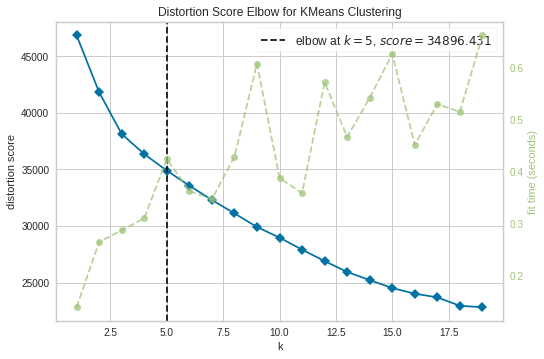

In [13]:
# KElbowVisualizer

model = KMeans(random_state=r_seed, verbose=0)
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)
visualizer.poof()

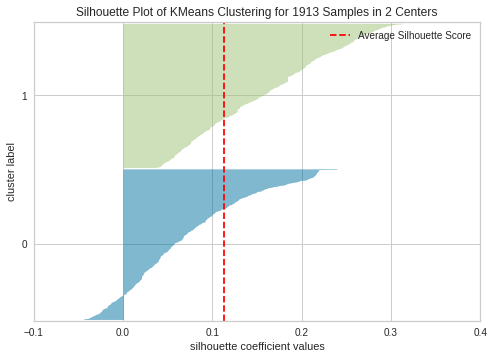

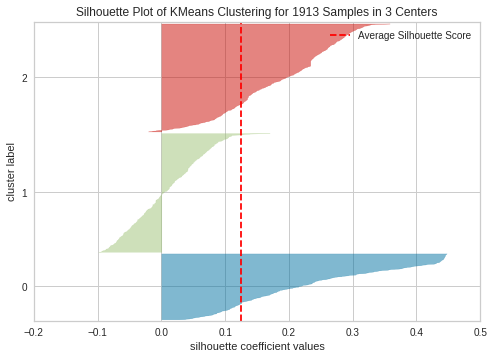

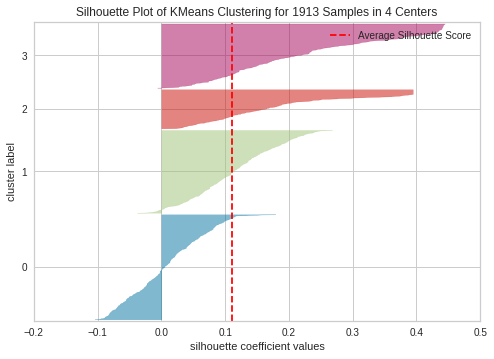

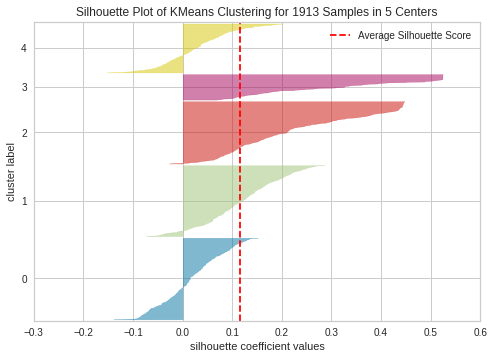

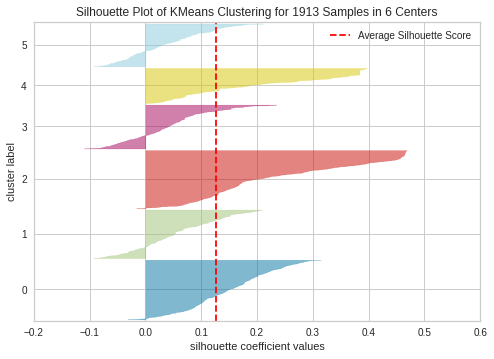

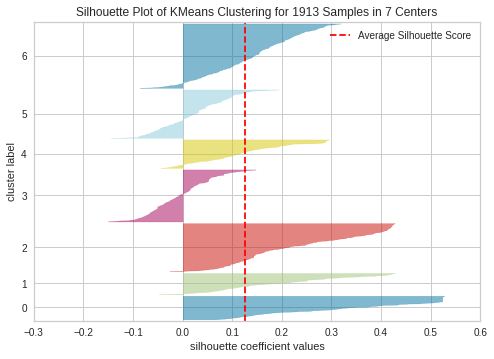

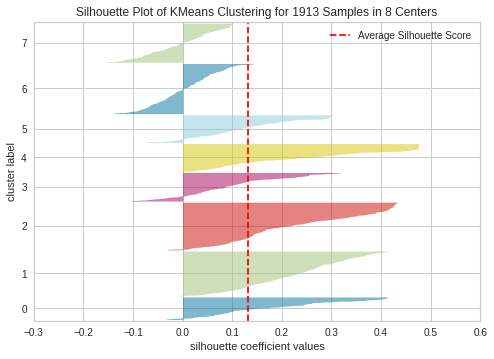

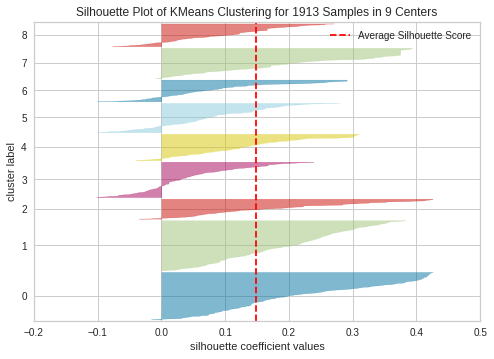

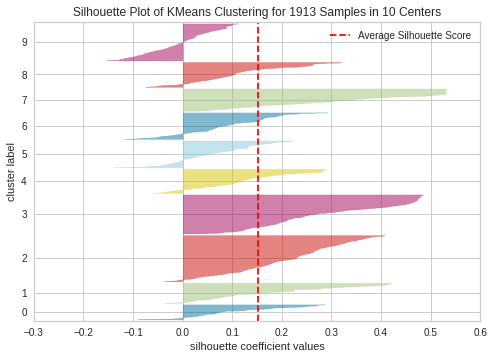

In [14]:
# Silhouette for 2 to 10 clusters

for c in range(2,11):
    model = KMeans(c, random_state=r_seed, verbose=0)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

# t-SNE 2D

In [15]:
# standard setup from notebooks

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, random_state=99)

In [16]:
# fit on unscaled data

X_tsne = tsne.fit_transform(data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1913 samples in 0.000s...
[t-SNE] Computed neighbors for 1913 samples in 0.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1913
[t-SNE] Computed conditional probabilities for sample 1913 / 1913
[t-SNE] Mean sigma: 1.173262
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.547668
[t-SNE] KL divergence after 1000 iterations: 0.794917


In [17]:
# embedded data into 2 low-dimensional space

print('original data shape:', data.shape)
print('embedded data shape:', X_tsne.shape)

original data shape: (1913, 26)
embedded data shape: (1913, 2)


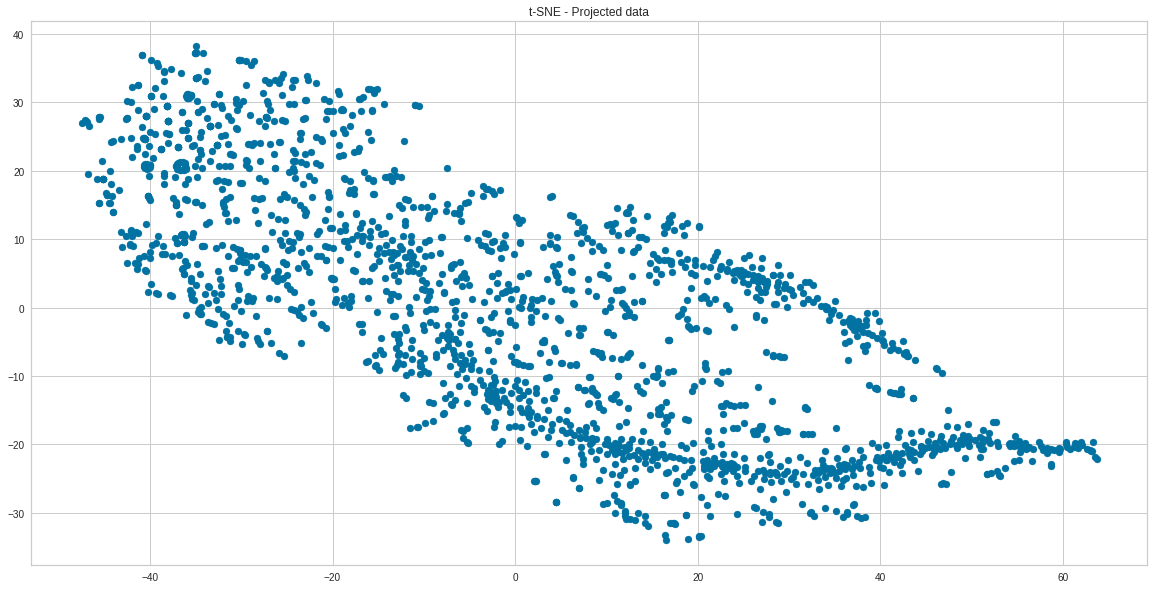

In [18]:
# visualization

fig, ax = plt.subplots(figsize =(20, 10))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE - Projected data')
plt.show()

## 3 clusters

In [19]:
n_clusters = 3

In [20]:
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_name.astype(str))

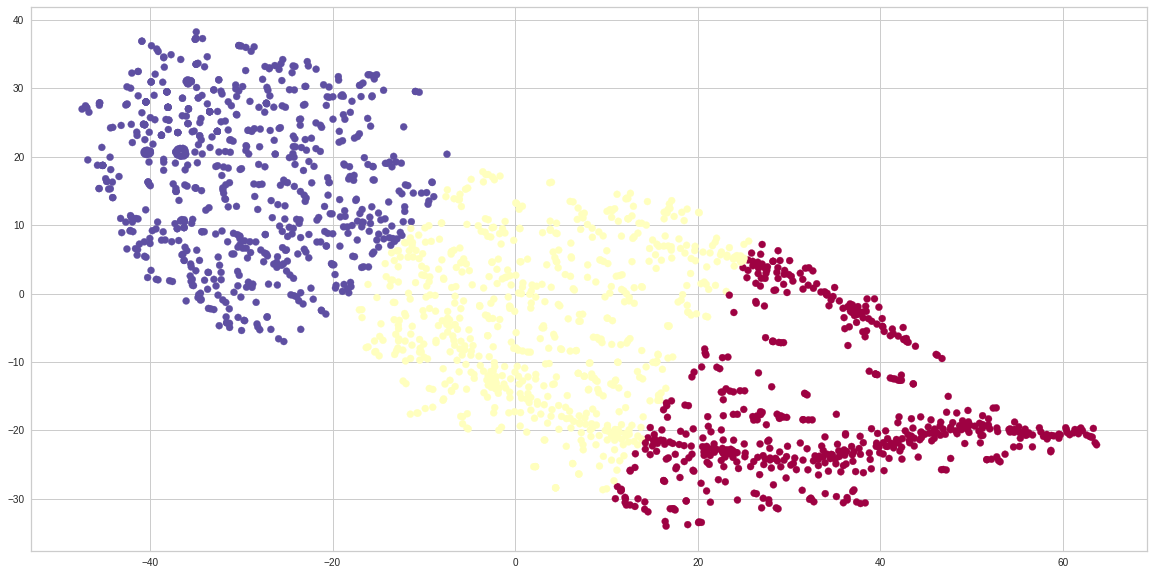

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_res["cluster"].values, cmap=plt.cm.Spectral)
plt.show()

## 4 clusters

In [22]:
n_clusters = 4

In [23]:
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_name.astype(str))

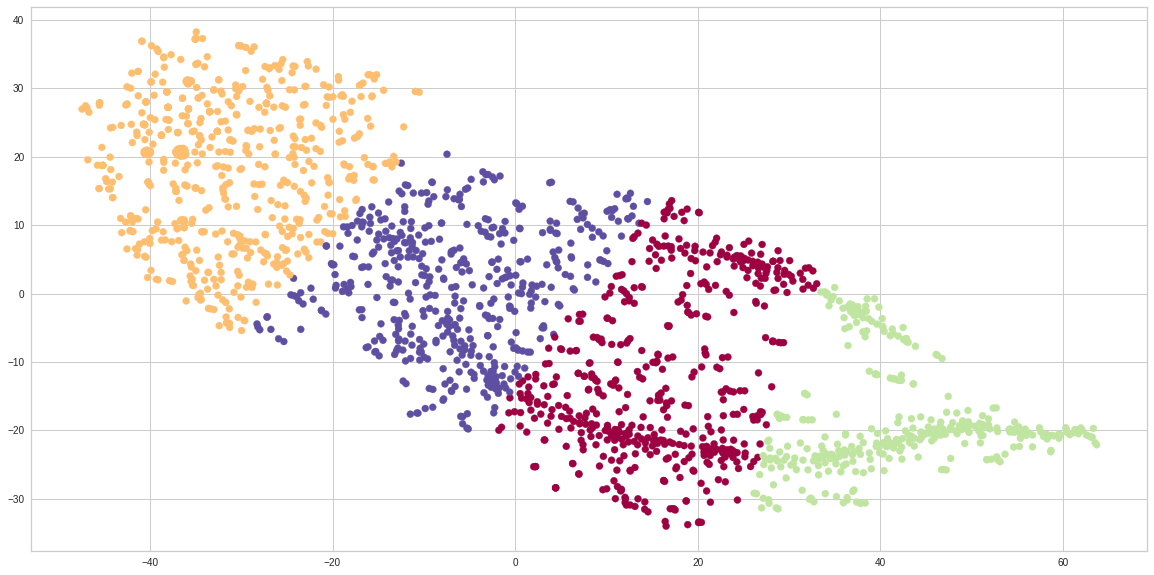

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_res["cluster"].values, cmap=plt.cm.Spectral)
plt.show()

## 5 clusters

In [25]:
n_clusters = 5

In [26]:
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_name.astype(str))

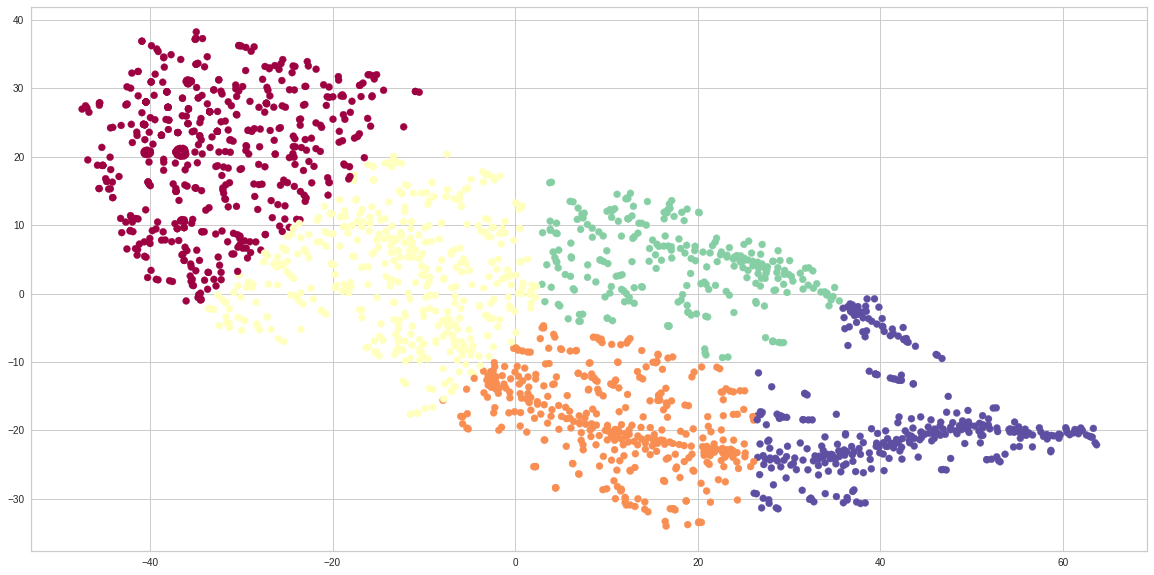

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_res["cluster"].values, cmap=plt.cm.Spectral)
plt.show()

## 10 clusters

In [28]:
n_clusters = 10

In [29]:
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_name.astype(str))

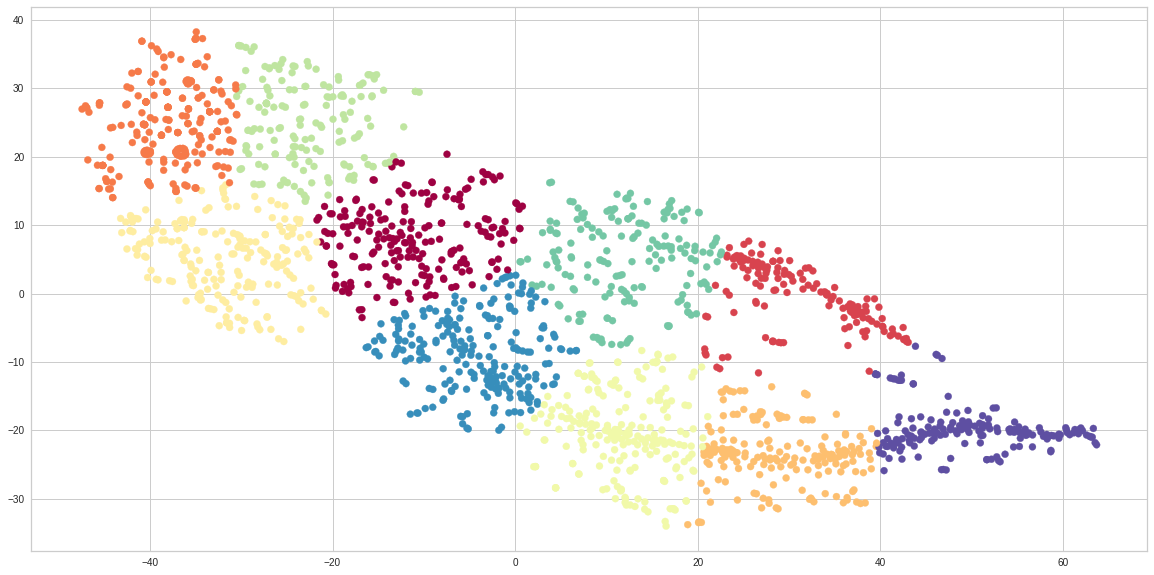

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_res["cluster"].values, cmap=plt.cm.Spectral)
plt.show()

# t-SNE 3D

In [31]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=1000, random_state=99)
X_tsne = tsne.fit_transform(data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1913 samples in 0.000s...
[t-SNE] Computed neighbors for 1913 samples in 0.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1913
[t-SNE] Computed conditional probabilities for sample 1913 / 1913
[t-SNE] Mean sigma: 1.173262
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.818161
[t-SNE] KL divergence after 1000 iterations: 0.635014


In [32]:
# visualization

fig = px.scatter_3d(
    X_tsne, x=0, y=1, z=2,
)
fig.update_traces(marker_size=8)
fig.show()

## 5 clusters

In [33]:
n_clusters = 5

In [34]:
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(merchant_name.astype(str))

In [35]:
# visualization

fig = px.scatter_3d(
    X_tsne, x=0, y=1, z=2,
    color=data_res["cluster"].values, labels={'color': 'cluster'}
)
fig.update_traces(marker_size=8)
fig.show()

# 5 clusters further analysis

In [36]:
# means per cluster by month

data_res.groupby('cluster').mean()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.764706,2.289593,1.680995,1.074661,1.237557,0.628959,0.644796,0.900452,0.463801,0.382353,...,0.721719,0.533937,0.389140,0.436652,0.486425,0.488688,0.705882,0.457014,0.916290,0.828054
1,105.256927,155.055416,120.954660,179.770781,160.642317,182.355164,230.105793,218.690176,155.556675,174.246851,...,220.007557,220.302267,309.161209,297.309824,169.727960,246.496222,228.972292,223.105793,182.115869,290.206549
2,10.796040,11.598020,16.320792,20.198020,15.415842,12.007921,14.100990,12.728713,15.289109,14.439604,...,19.330693,18.431683,22.427723,19.069307,19.600000,28.960396,27.978218,21.843564,19.453465,26.881188
3,18014.607903,16681.650456,17090.562310,18389.714286,21243.550152,19134.328267,19028.480243,19118.951368,18112.826748,20463.562310,...,25216.389058,23126.221884,22567.930091,21979.303951,21361.209726,25940.768997,21380.610942,21968.720365,23634.370821,23019.270517
4,34.562500,41.020833,209.825000,38.487500,36.616667,403.104167,71.700000,48.166667,267.470833,45.054167,...,37.625000,576.329167,63.787500,46.375000,339.854167,70.537500,72.458333,393.466667,37.891667,34.154167


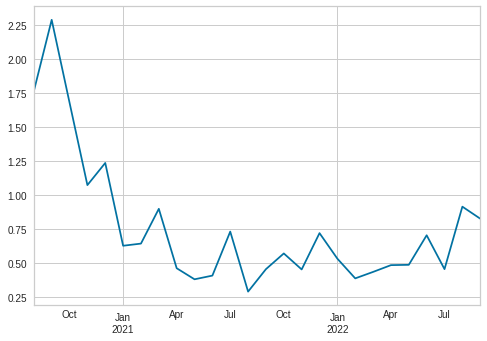

In [37]:
# means plot per cluster n1

data_res.groupby('cluster').mean().iloc[0].plot()
plt.show()

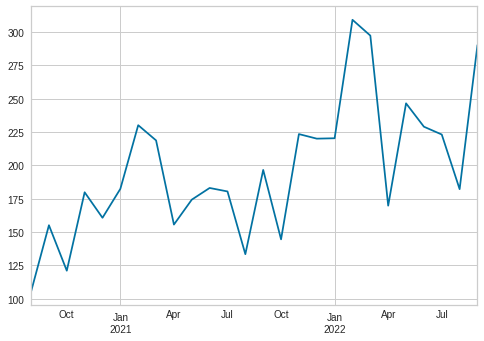

In [38]:
# means plot per cluster n2

data_res.groupby('cluster').mean().iloc[1].plot()
plt.show()

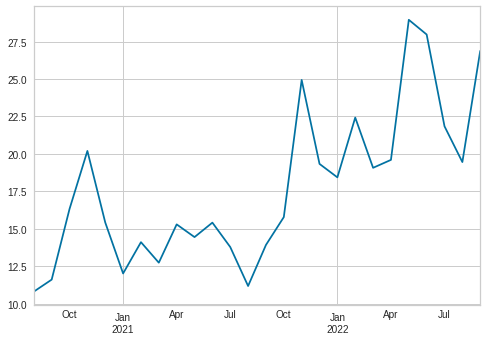

In [39]:
# means plot per cluster n3

data_res.groupby('cluster').mean().iloc[2].plot()
plt.show()

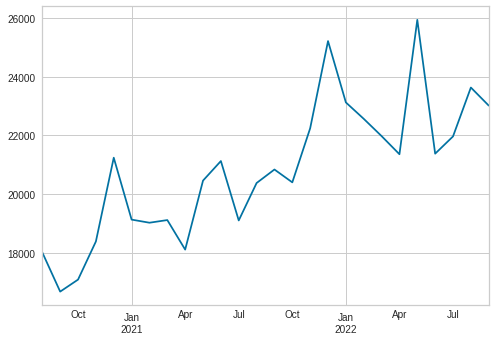

In [40]:
# means plot per cluster n4

data_res.groupby('cluster').mean().iloc[3].plot()
plt.show()

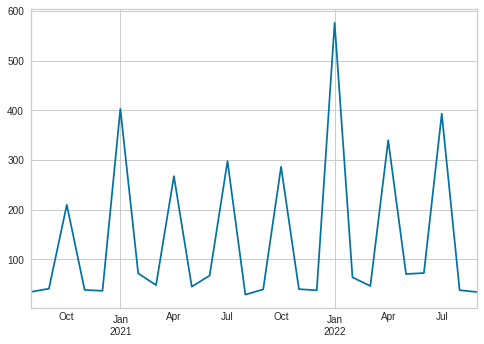

In [41]:
# means plot per cluster n5

data_res.groupby('cluster').mean().iloc[4].plot()
plt.show()

## Seasonal decompose

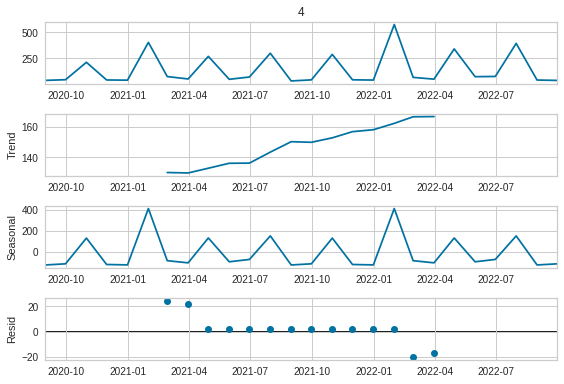

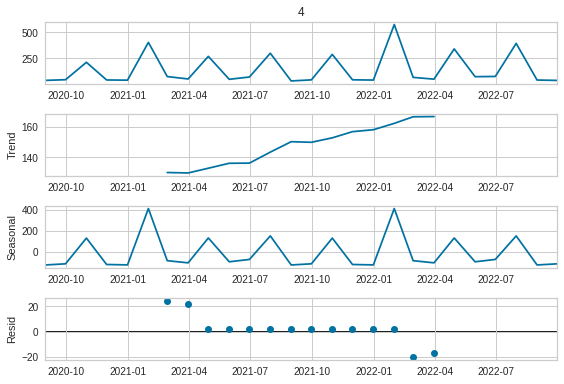

In [42]:
# for cluster n5 additive

seasonal_decompose(data_res.groupby('cluster').mean().iloc[4], model='additive').plot()

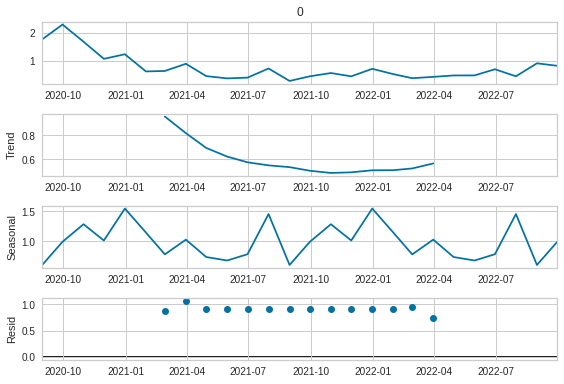

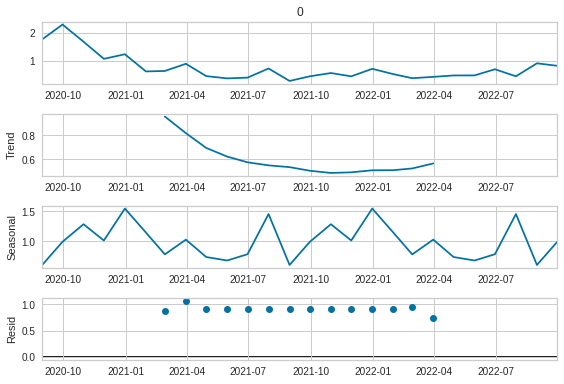

In [43]:
# for cluster n5 multiplicative

seasonal_decompose(data_res.groupby('cluster').mean().iloc[0], model='multiplicative').plot()

### Trend

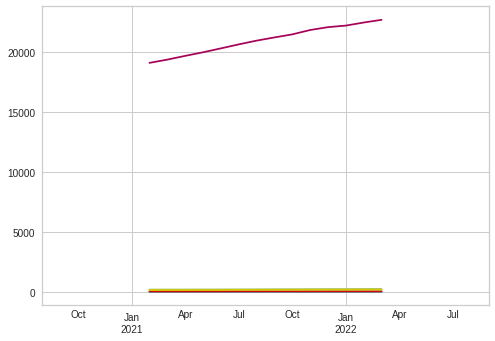

In [44]:
# stacked trend multiplicative for all 5 clusters

for i in range(5):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').trend
  output.plot()
plt.show()

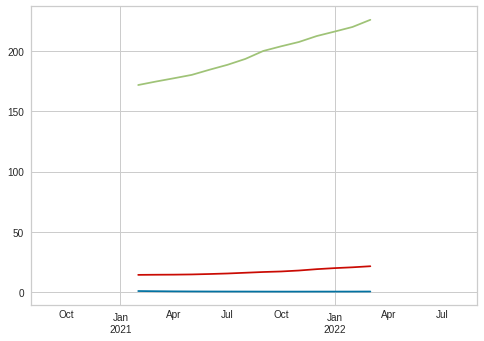

In [45]:
# stacked trend multiplicative for first 3 clusters

for i in range(3):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').trend
  output.plot()
plt.show()

### Seasonal

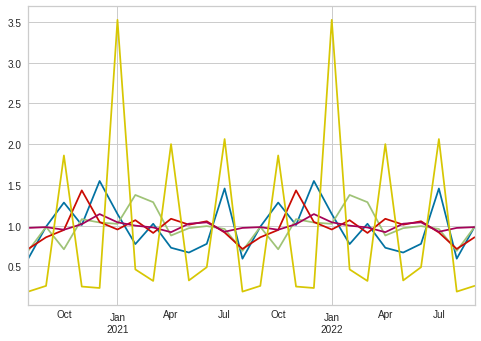

In [46]:
# stacked seasonal multiplicative for all 5 clusters

for i in range(5):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').seasonal
  output.plot()
plt.show()

### Resid

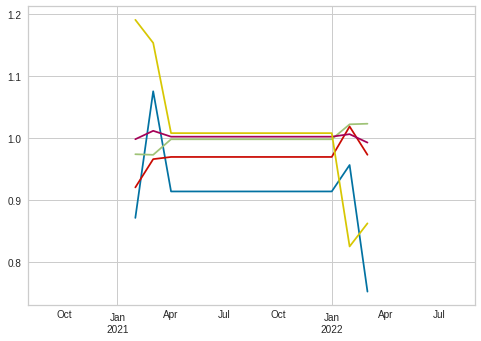

In [47]:
# stacked resid multiplicative for all 5 clusters

for i in range(5):
  output = seasonal_decompose(data_res.groupby('cluster').mean().iloc[i], model='multiplicative').resid
  output.plot()
plt.show()